In [1]:
import GPy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mnist

#munge data from mnist
rawX = mnist.train_images().astype(np.float32)
def subsample(X,step=3):
    return np.array([im[0::step,0::step] for im in X])
rawX = subsample(rawX)
rawX = rawX[:,1:9,1:9] #remove row around edges of images (rarely used)

allX = rawX.reshape(60000,np.prod(rawX.shape[1:])) #flatten it
ally = mnist.train_labels()
keep = ally<2
allX = allX[keep,:]
ally = ally[keep]
ally = ally[:,None]
X = allX[0:300,:]
y = ally[0:300,:]
testX = allX[500:600,:]
testy = ally[500:600,:]

# GP Simple Classifier

Here we demonstrate attacking the simple GP classifier

In [2]:
#build model
from GPadversarial import simple
m = simple.build_model(X,y)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s18  0004   1.884938e+02   3.918709e-01 
    01s66  0034   2.133011e+01   7.352433e-11 
Runtime:     01s66
Optimization status: Converged



In [3]:
#compute classification accuracy on test data.
pred, _ = m.predict(testX)
np.mean((pred>0.5)==(testy==1))

1.0

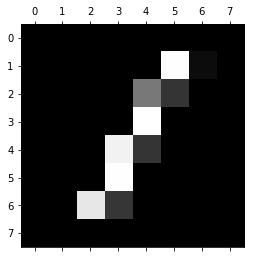

In [4]:
advX = testX[1:2,:].copy() #the initial test point we're going to use...
plt.matshow(advX.reshape(rawX.shape[1],rawX.shape[2]),cmap='gray')

In [42]:
N = 64
adv = advX.copy()
for it in range(2):
    adv = adv.repeat(N,0)
    for i in range(N):
        adv[i::N,i]=255

In [43]:
lowest = np.Inf
lowestim = None
for it in range(len(adv)):
    b = adv[it,:][None,:]
    for it in range(2):
        b = b.repeat(N,0)
        for i in range(N):
            b[i::N,i]=255
    preds = m.predict(b)[0]
    minpredi = np.argmin(preds)
    if (preds[minpredi]<lowest):
        lowest = preds[minpredi]
        lowestim = b[minpredi]

[ 0.39626248]


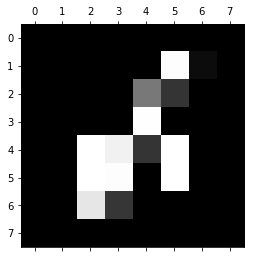

In [44]:
print(lowest)
plt.matshow(lowestim.reshape(rawX.shape[1],rawX.shape[2]),cmap='gray')